In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from scipy.stats import norm
import copy

## Q1 (a)

In [2]:
N = 9
m = 3
mu = 3
beta = 0.96
phi = 1
rho = 0.3
sigma_sq_er = 0.01 * (1-(rho)**2)
sigma_sq_z = sigma_sq_er/(1-rho**2)
zn = m*(sigma_sq_z)**(1/2)
z0 = -zn
s = (zn-z0)/(N-1)
z_grid = np.arange(z0,zn+s,s)
print(z_grid)
b = np.zeros((9,9))
for j in range(N):
    for i in range(N):
        if j==0: 
            b[i,j] = norm.cdf((z0-rho*z_grid[i]+s/2)/sigma_sq_er**(1/2))
        elif j==N-1:
            b[i,j] = 1-norm.cdf((zn-rho*z_grid[i]-s/2)/sigma_sq_er**(1/2))
        else:
            b[i,j] = norm.cdf((z_grid[j] - rho*z_grid[i] + s/2)/sigma_sq_er**(1/2)) - norm.cdf((z_grid[j]-rho*z_grid[i]-s/2)
                                                                                       /sigma_sq_er**(1/2))
            

print(b)
print(np.exp(z_grid))

[-0.3   -0.225 -0.15  -0.075  0.     0.075  0.15   0.225  0.3  ]
[[3.52805842e-02 1.18091475e-01 2.53397008e-01 3.02191106e-01
  2.00357192e-01 7.37963542e-02 1.50732903e-02 1.70313471e-03
  1.09855133e-04]
 [2.04690973e-02 8.37373046e-02 2.14354009e-01 3.04863406e-01
  2.41062359e-01 1.05927790e-01 2.58286367e-02 3.48664672e-03
  2.70750483e-04]
 [1.13032654e-02 5.63099151e-02 1.71986068e-01 2.91733854e-01
  2.75102216e-01 1.44200358e-01 4.19648527e-02 6.76624640e-03
  6.33224834e-04]
 [5.93671933e-03 3.59079082e-02 1.30879138e-01 2.64803013e-01
  2.97789168e-01 1.86176853e-01 6.46532749e-02 1.24480924e-02
  1.40583226e-03]
 [2.96390859e-03 2.17123197e-02 9.44590725e-02 2.27984995e-01
  3.05759408e-01 2.27984995e-01 9.44590725e-02 2.17123197e-02
  2.96390859e-03]
 [1.40583226e-03 1.24480924e-02 6.46532749e-02 1.86176853e-01
  2.97789168e-01 2.64803013e-01 1.30879138e-01 3.59079082e-02
  5.93671933e-03]
 [6.33224834e-04 6.76624640e-03 4.19648527e-02 1.44200358e-01
  2.75102216e-01 2.91

## Q1 (b):
Primeira parte é uma tentativa mais elegante, o segundo bloco é mais 'braçal'

In [3]:
a_size=201
valor = np.zeros((1,a_size))
print(valor[:,1])

[0.]


[-1.    -0.975 -0.95  -0.925 -0.9   -0.875 -0.85  -0.825 -0.8   -0.775
 -0.75  -0.725 -0.7   -0.675 -0.65  -0.625 -0.6   -0.575 -0.55  -0.525
 -0.5   -0.475 -0.45  -0.425 -0.4   -0.375 -0.35  -0.325 -0.3   -0.275
 -0.25  -0.225 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025
  0.     0.025  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225
  0.25   0.275  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475
  0.5    0.525  0.55   0.575  0.6    0.625  0.65   0.675  0.7    0.725
  0.75   0.775  0.8    0.825  0.85   0.875  0.9    0.925  0.95   0.975
  1.     1.025  1.05   1.075  1.1    1.125  1.15   1.175  1.2    1.225
  1.25   1.275  1.3    1.325  1.35   1.375  1.4    1.425  1.45   1.475
  1.5    1.525  1.55   1.575  1.6    1.625  1.65   1.675  1.7    1.725
  1.75   1.775  1.8    1.825  1.85   1.875  1.9    1.925  1.95   1.975
  2.     2.025  2.05   2.075  2.1    2.125  2.15   2.175  2.2    2.225
  2.25   2.275  2.3    2.325  2.35   2.375  2.4    2.425  2.45   2.475
  2.5 

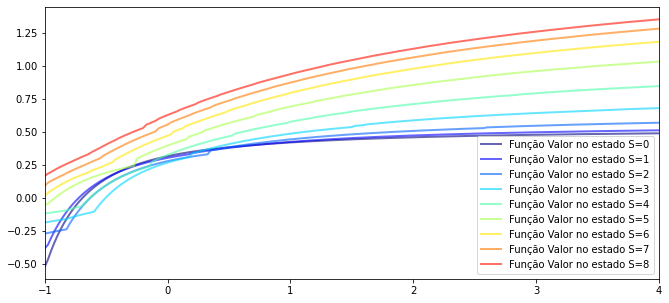

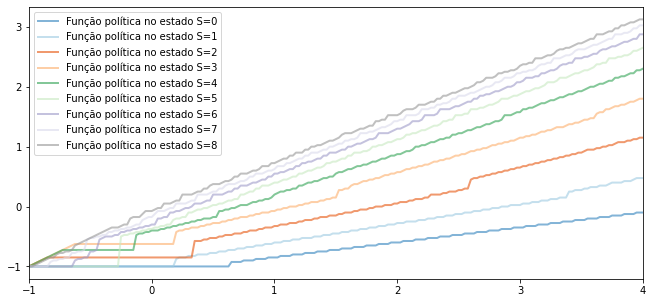

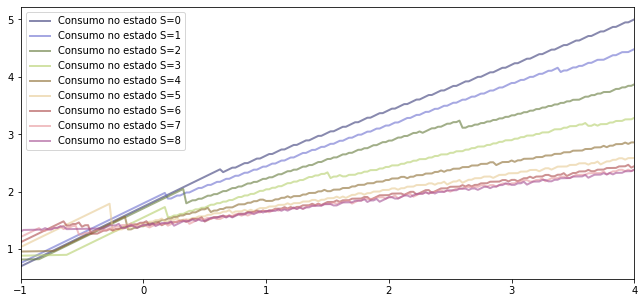

In [4]:
# ORDEM DA FUNÇÃO VALOR: LINHA É a, COLUNA É Z
a_size=201
a_max=4
tol = 10**(-6)
r=0.04
V_0 = np.zeros((a_size, N))
grid_a = np.linspace(-phi, a_max, a_size)
print(grid_a)
V_new = (V_0)
erro = 1
g = np.zeros((a_size, N))
t= 1
while(erro > tol):
    V_old = (V_new)
    t += 1
    for i in range(N):
        probabilidades = b[i,:]
        for j in range(a_size):
            estoque = np.exp(z_grid[i]) + (1+r)*grid_a[j]
            if j == 0:
                start = 0
            valor = np.zeros((1,a_size))
            t = (start)
            c_t = (estoque - grid_a[t])
            if c_t >= 0:
                u = ((c_t**(1-mu) - 1)/(1-mu))
            elif c_t < 0:
                u = -1/(1-mu)
            esperanca = 0
            for w in range(N):
                esperanca = (esperanca + probabilidades[w]*V_old[t,w])
            valor[:,t] = (u + beta*esperanca)
            for t in range((start+1), a_size):
                c_t = (estoque - grid_a[t])
                if c_t >= 0:
                    u = ((c_t**(1-mu) - 1)/(1-mu))
                elif c_t < 0:
                    u = -1/(1-mu)
                esperanca = 0
                for w in range(N):
                    esperanca = esperanca + probabilidades[w]*V_old[t,w]
                valor[:,t] = (u + beta*esperanca)
                if valor[:,t]< valor[:,t-1]:
                    break
            if valor[:,t]< valor[:,t-1]:
                V_new[j,i] = (valor[:,t-1])
                indice_a = (t-1)
            elif valor[:,t] >= valor[:,t-1]:
                V_new[j,i] = (valor[:,t])
                indice_a = (t)
            start = (indice_a)
            g[j,i] = (grid_a[indice_a])
    
    dif = np.abs(V_new - V_old)
    erro = np.max(np.max(dif))
    print(erro)
fig, ax = plt.subplots()
for i in range(N):
    ax.plot(grid_a, V_new[:,i], color=plt.cm.jet(i / N), lw=2, alpha=0.6, label=f'Função Valor no estado S={i}')
ax.legend()
ax.set(xlim=(np.min(grid_a), np.max(grid_a)))
plt.show()
fig, ax = plt.subplots()
for i in range(N):
    ax.plot(grid_a, g[:,i], color=plt.cm.tab20c(i / N), lw=2, alpha=0.6, label=f'Função política no estado S={i}')
ax.legend()
ax.set(xlim=(np.min(grid_a), np.max(grid_a)))
plt.show()
fig, ax = plt.subplots()
for i in range(N):
    ax.plot(grid_a, -g[:,i]+(1+r)*grid_a+np.exp(z_grid[i]), color=plt.cm.tab20b(i / N), lw=2, alpha=0.6, label=f'Consumo no estado S={i}')
ax.legend()
ax.set(xlim=(np.min(grid_a), np.max(grid_a)))
plt.show()

## Q1(c)

In [5]:
pi_0 = np.full((a_size, N),(1/(N*a_size)))

tol_distrb = 10**(-6)
pi_old = (pi_0)
pi_new = (pi_0)
pi_dif = np.ones((a_size,N),dtype=float)
erro = 1
t=0
pi_iter = [pi_0]
while(erro>tol_distrb):
    t += 1
    for i in range(N):
        for j in range(a_size):
            aux = pi_old*(g == grid_a[j])
            pi_new[j,i] = sum(aux)@b[:,i]
            pi_dif[j,i] = (pi_new[j,i]-pi_old[j,i])
            pi_dif[j,i] = np.abs(pi_dif[j,i])
    erro = np.max(pi_dif)
    pi_old = (pi_new)
    
print(f'Convergência após t={t}')

Convergência após t=1


## Q1 (d)

In [6]:
# CALCULAR DEMANDA POR CAPITAL

demanda = 0

for i in range(N):
    for j in range(a_size):
        demanda += g[j,i]*pi_new[j,i]
       
        
print(demanda)

-0.12786349552410992


## Q1 (e)
### i.

In [7]:
N = 9
m = 3
mu = 5
beta = 0.96
phi = 1
rho = 0.3
sigma_sq_er = 0.01 * (1-(rho)**2)
sigma_sq_z = sigma_sq_er/(1-rho**2)
zn = m*(sigma_sq_z)**(1/2)
z0 = -zn
s = (zn-z0)/(N-1)
z_grid = np.arange(z0,zn+s,s)
b = np.zeros((9,9))
for j in range(N):
    for i in range(N):
        if j==0: 
            b[i,j] = norm.cdf((z0-rho*z_grid[i]+s/2)/sigma_sq_er**(1/2))
        elif j==N-1:
            b[i,j] = 1-norm.cdf((zn-rho*z_grid[i]-s/2)/sigma_sq_er**(1/2))
        else:
            b[i,j] = norm.cdf((z_grid[j] - rho*z_grid[i] + s/2)/sigma_sq_er**(1/2)) - norm.cdf((z_grid[j]-rho*z_grid[i]-s/2)
                                                                                       /sigma_sq_er**(1/2))
a_size=201
valor = np.zeros((1,a_size))
# ORDEM DA FUNÇÃO VALOR: LINHA É a, COLUNA É Z
a_size=201
a_max=4
tol = 10**(-6)
r=0.04
V_0 = np.zeros((a_size, N))
grid_a = np.linspace(-phi, a_max, a_size)
V_new = (V_0)
erro = 1
g = np.zeros((a_size, N))
t= 1
while(erro > tol):
    V_old = (V_new)
    t += 1
    for i in range(N):
        probabilidades = b[i,:]
        for j in range(a_size):
            estoque = np.exp(z_grid[i]) + (1+r)*grid_a[j]
            if j == 0:
                start = 0
            valor = np.zeros((1,a_size))
            t = (start)
            c_t = (estoque - grid_a[t])
            if c_t >= 0:
                u = ((c_t**(1-mu) - 1)/(1-mu))
            elif c_t < 0:
                u = -1/(1-mu)
            esperanca = 0
            for w in range(N):
                esperanca = (esperanca + probabilidades[w]*V_old[t,w])
            valor[:,t] = (u + beta*esperanca)
            for t in range((start+1), a_size):
                c_t = (estoque - grid_a[t])
                if c_t >= 0:
                    u = ((c_t**(1-mu) - 1)/(1-mu))
                elif c_t < 0:
                    u = -1/(1-mu)
                esperanca = 0
                for w in range(N):
                    esperanca = esperanca + probabilidades[w]*V_old[t,w]
                valor[:,t] = (u + beta*esperanca)
                if valor[:,t]< valor[:,t-1]:
                    break
            if valor[:,t]< valor[:,t-1]:
                V_new[j,i] = (valor[:,t-1])
                indice_a = (t-1)
            elif valor[:,t] >= valor[:,t-1]:
                V_new[j,i] = (valor[:,t])
                indice_a = (t)
            start = (indice_a)
            g[j,i] = (grid_a[indice_a])
    
    dif = np.abs(V_new - V_old)
    erro = np.max(np.max(dif))
pi_0 = np.full((a_size, N),(1/(N*a_size)))

tol_distrb = 10**(-6)
pi_new = (pi_0)
pi_dif = np.ones((a_size,N),dtype=float)
erro = 1
t=0
pi_iter = [pi_0]
while(erro>tol_distrb):
    t += 1
    for i in range(N):
        for j in range(a_size):
            aux = pi_old*(g == grid_a[j])
            pi_new[j,i] = sum(aux)@b[:,i]
            pi_dif[j,i] = (pi_new[j,i]-pi_old[j,i])
            pi_dif[j,i] = np.abs(pi_dif[j,i])
    erro = np.max(pi_dif)
    pi_old = (pi_new)
# CALCULAR DEMANDA POR CAPITAL

demanda2 = 0

for i in range(N):
    for j in range(a_size):
        demanda2 += g[j,i]*pi_new[j,i]
               
if demanda2>demanda: 
    sinal = 'um aumento'
else: 
    sinal = 'uma diminuição'

print(f'Nosso excesso de demanda é de {demanda2}, {sinal} de {abs(demanda2-demanda)}. Originalmente tínhamos {demanda}.')

Nosso excesso de demanda é de -0.5670329857305776, uma diminuição de 0.43916949020646767. Originalmente tínhamos -0.12786349552410992.


### ii.

In [8]:
N = 9
m = 3
mu = 3
beta = 0.96
phi = 1
rho = 0.6
sigma_sq_er = 0.01 * (1-(rho)**2)
sigma_sq_z = sigma_sq_er/(1-rho**2)
zn = m*(sigma_sq_z)**(1/2)
z0 = -zn
s = (zn-z0)/(N-1)
z_grid = np.arange(z0,zn+s,s)
b = np.zeros((9,9))
for j in range(N):
    for i in range(N):
        if j==0: 
            b[i,j] = norm.cdf((z0-rho*z_grid[i]+s/2)/sigma_sq_er**(1/2))
        elif j==N-1:
            b[i,j] = 1-norm.cdf((zn-rho*z_grid[i]-s/2)/sigma_sq_er**(1/2))
        else:
            b[i,j] = norm.cdf((z_grid[j] - rho*z_grid[i] + s/2)/sigma_sq_er**(1/2)) - norm.cdf((z_grid[j]-rho*z_grid[i]-s/2)
                                                                                       /sigma_sq_er**(1/2))
a_size=201
valor = np.zeros((1,a_size))
# ORDEM DA FUNÇÃO VALOR: LINHA É a, COLUNA É Z
a_size=201
a_max=4
tol = 10**(-6)
r=0.04
V_0 = np.zeros((a_size, N))
grid_a = np.linspace(-phi, a_max, a_size)
V_new = (V_0)
erro = 1
g = np.zeros((a_size, N))
t= 1
while(erro > tol):
    V_old = (V_new)
    t += 1
    for i in range(N):
        probabilidades = b[i,:]
        for j in range(a_size):
            estoque = np.exp(z_grid[i]) + (1+r)*grid_a[j]
            if j == 0:
                start = 0
            valor = np.zeros((1,a_size))
            t = (start)
            c_t = (estoque - grid_a[t])
            if c_t >= 0:
                u = ((c_t**(1-mu) - 1)/(1-mu))
            elif c_t < 0:
                u = -1/(1-mu)
            esperanca = 0
            for w in range(N):
                esperanca = (esperanca + probabilidades[w]*V_old[t,w])
            valor[:,t] = (u + beta*esperanca)
            for t in range((start+1), a_size):
                c_t = (estoque - grid_a[t])
                if c_t >= 0:
                    u = ((c_t**(1-mu) - 1)/(1-mu))
                elif c_t < 0:
                    u = -1/(1-mu)
                esperanca = 0
                for w in range(N):
                    esperanca = esperanca + probabilidades[w]*V_old[t,w]
                valor[:,t] = (u + beta*esperanca)
                if valor[:,t]< valor[:,t-1]:
                    break
            if valor[:,t]< valor[:,t-1]:
                V_new[j,i] = (valor[:,t-1])
                indice_a = (t-1)
            elif valor[:,t] >= valor[:,t-1]:
                V_new[j,i] = (valor[:,t])
                indice_a = (t)
            start = (indice_a)
            g[j,i] = (grid_a[indice_a])
    
    dif = np.abs(V_new - V_old)
    erro = np.max(np.max(dif))
pi_0 = np.full((a_size, N),(1/(N*a_size)))

tol_distrb = 10**(-6)
pi_old = (pi_0)
pi_new = (pi_0)
pi_dif = np.ones((a_size,N),dtype=float)
erro = 1
t=0
pi_iter = [pi_0]
while(erro>tol_distrb):
    t += 1
    for i in range(N):
        for j in range(a_size):
            aux = pi_old*(g == grid_a[j])
            pi_new[j,i] = sum(aux)@b[:,i]
            pi_dif[j,i] = (pi_new[j,i]-pi_old[j,i])
            pi_dif[j,i] = np.abs(pi_dif[j,i])
    erro = np.max(pi_dif)
    pi_old = (pi_new)
# CALCULAR DEMANDA POR CAPITAL

demanda3 = 0

for i in range(N):
    for j in range(a_size):
        demanda3 += g[j,i]*pi_new[j,i]
               
if demanda3>demanda: 
    sinal = 'um aumento'
else: 
    sinal = 'uma diminuição'

print(f'Nosso excesso de demanda é de {demanda3}, {sinal} de {abs(demanda3-demanda)}. Originalmente tínhamos {demanda}.')

Nosso excesso de demanda é de 0.08573239391350089, um aumento de 0.21359588943761082. Originalmente tínhamos -0.12786349552410992.


### iii.

In [9]:
N = 9
m = 3
mu = 3
beta = 0.96
phi = 1
rho = 0.3
sigma_sq_er = 0.04 * (1-(rho)**2)
sigma_sq_z = sigma_sq_er/(1-rho**2)
zn = m*(sigma_sq_z)**(1/2)
z0 = -zn
s = (zn-z0)/(N-1)
z_grid = np.arange(z0,zn+s,s)
b = np.zeros((9,9))
for j in range(N):
    for i in range(N):
        if j==0: 
            b[i,j] = norm.cdf((z0-rho*z_grid[i]+s/2)/sigma_sq_er**(1/2))
        elif j==N-1:
            b[i,j] = 1-norm.cdf((zn-rho*z_grid[i]-s/2)/sigma_sq_er**(1/2))
        else:
            b[i,j] = norm.cdf((z_grid[j] - rho*z_grid[i] + s/2)/sigma_sq_er**(1/2)) - norm.cdf((z_grid[j]-rho*z_grid[i]-s/2)
                                                                                       /sigma_sq_er**(1/2))
a_size=201
valor = np.zeros((1,a_size))
# ORDEM DA FUNÇÃO VALOR: LINHA É a, COLUNA É Z
a_size=201
a_max=4
tol = 10**(-6)
r=0.04
V_0 = np.zeros((a_size, N))
grid_a = np.linspace(-phi, a_max, a_size)
V_new = (V_0)
erro = 1
g = np.zeros((a_size, N))
t= 1
while(erro > tol):
    V_old = (V_new)
    t += 1
    for i in range(N):
        probabilidades = b[i,:]
        for j in range(a_size):
            estoque = np.exp(z_grid[i]) + (1+r)*grid_a[j]
            if j == 0:
                start = 0
            valor = np.zeros((1,a_size))
            t = (start)
            c_t = (estoque - grid_a[t])
            if c_t >= 0:
                u = ((c_t**(1-mu) - 1)/(1-mu))
            elif c_t < 0:
                u = -1/(1-mu)
            esperanca = 0
            for w in range(N):
                esperanca = (esperanca + probabilidades[w]*V_old[t,w])
            valor[:,t] = (u + beta*esperanca)
            for t in range((start+1), a_size):
                c_t = (estoque - grid_a[t])
                if c_t >= 0:
                    u = ((c_t**(1-mu) - 1)/(1-mu))
                elif c_t < 0:
                    u = -1/(1-mu)
                esperanca = 0
                for w in range(N):
                    esperanca = esperanca + probabilidades[w]*V_old[t,w]
                valor[:,t] = (u + beta*esperanca)
                if valor[:,t]< valor[:,t-1]:
                    break
            if valor[:,t]< valor[:,t-1]:
                V_new[j,i] = (valor[:,t-1])
                indice_a = (t-1)
            elif valor[:,t] >= valor[:,t-1]:
                V_new[j,i] = (valor[:,t])
                indice_a = (t)
            start = (indice_a)
            g[j,i] = (grid_a[indice_a])
    
    dif = np.abs(V_new - V_old)
    erro = np.max(np.max(dif))
pi_0 = np.full((a_size, N),(1/(N*a_size)))

tol_distrb = 10**(-6)
pi_old = (pi_0)
pi_new = (pi_0)
pi_dif = np.ones((a_size,N),dtype=float)
erro = 1
t=0
pi_iter = [pi_0]
while(erro>tol_distrb):
    t += 1
    for i in range(N):
        for j in range(a_size):
            aux = pi_old*(g == grid_a[j])
            pi_new[j,i] = sum(aux)@b[:,i]
            pi_dif[j,i] = (pi_new[j,i]-pi_old[j,i])
            pi_dif[j,i] = np.abs(pi_dif[j,i])
    erro = np.max(pi_dif)
    pi_old = (pi_new)
# CALCULAR DEMANDA POR CAPITAL

demanda4 = 0

for i in range(N):
    for j in range(a_size):
        demanda4 += g[j,i]*pi_new[j,i]
if demanda4>demanda: 
    sinal = 'um aumento'
else: 
    sinal = 'uma diminuição'

print(f'Nosso excesso de demanda é de {demanda4}, {sinal} de {abs(demanda4-demanda)}. Originalmente tínhamos {demanda}.')

Nosso excesso de demanda é de 0.2138182031340311, um aumento de 0.341681698658141. Originalmente tínhamos -0.12786349552410992.


In [1]:
cdf_a = np.zeros(a_size)
for i in range(a_size):
    for j in range(i):
        cdf_a[i] += dist_a[j]
print(cdf_a)

fig, ax = plt.subplots()
ax.plot(grid_a, cdf_a, color=plt.cm.jet(i / N), lw=2, alpha=0.6, label=f'Distribuição Acumulada dos Ativos')
ax.legend()
ax.set(xlim=(np.min(grid_a), np.max(grid_a)))
plt.show()

a_inf_0 = cdf_a[np.where(grid_a == 0)]
a_inf_1 = cdf_a[np.where(grid_a == 1)]
a_inf_2 = cdf_a[np.where(grid_a == 2)]
a_inf_3 = cdf_a[np.where(grid_a == 3)]

a_inf_0 = "{:.2%}".format(a_inf_0[0])
a_inf_1 = "{:.2%}".format(a_inf_1[0])
a_sup_2 = "{:.2%}".format(1-a_inf_2[0])
a_sup_3 = "{:.2%}".format(1-a_inf_3[0])

print(f'{a_inf_0} das famílias tem ativos negativos')
print(f'{a_inf_1} das famílias tem ativos entre -1 e 1')
print(f'Apenas {a_sup_2} das famílias tem ativos acima de 2')
print(f'Apenas {a_sup_3} das famílias tem ativos acima de 3')

def diffperc(cdf,perc):
    dcdf = np.ones(len(cdf))
    for j in range(i):
        dcdf[j] = copy.deepcopy(np.abs(cdf[j]-(1-perc)))
    indexmin = (np.where(dcdf == np.min(dcdf)))
    return(indexmin)

a_inf_0 = cdf_a[np.where(grid_a == 0)]
a_inf_1 = cdf_a[np.where(grid_a == 1)]
a_inf_2 = cdf_a[np.where(grid_a == 2)]
a_inf_3 = cdf_a[np.where(grid_a == 3)]
a_inf_0 = "{:.2f}".format(a_inf_0[0])
a_inf_1 = "{:.2f}".format(a_inf_1[0])
a_sup_2 = "{:.2f}".format(1-a_inf_2[0])
a_sup_3 = "{:.2f}".format(1-a_inf_3[0])

a_top_1 = "{:.2f}".format(min(np.double((a_max-grid_a[diffperc(cdf_a,0.01)])/a_max),1))
print(a_top_1)
a_top_5 = "{:.2f}".format(min(np.double((a_max-grid_a[diffperc(cdf_a,0.05)])/a_max),1))
print(a_top_5)
a_top_20 = "{:.2f}".format(min(np.double((a_max-grid_a[diffperc(cdf_a,0.2)])/a_max),1))
print(a_top_20)
a_top_40 = "{:.2f}".format(min(np.double((a_max-grid_a[diffperc(cdf_a,0.4)])/a_max),1))
print(a_top_40)
a_top_60 = "{:.2f}".format(min(np.double((a_max-grid_a[diffperc(cdf_a,0.6)])/a_max),1))
print(a_top_60)

def gini_coefficient(y):
    r"""
    Implements the Gini inequality index
    Parameters
    -----------
    y : array_like(float)
        Array of income/wealth for each individual.
        Ordered or unordered is fine
    Returns
    -------
    Gini index: float
        The gini index describing the inequality of the array of income/wealth
    References
    ----------
    https://en.wikipedia.org/wiki/Gini_coefficient
    """
    n = len(y)
    i_sum = np.zeros(n)
    for i in prange(n):
        for j in range(n):
            i_sum[i] += abs(y[i] - y[j])
    return np.sum(i_sum) / (2 * n * np.sum(y))

gini_bewley = "{:.2f}".format(gini_coefficient(dist_a))
print(gini_bewley)


NameError: name 'np' is not defined

In [ ]:
resultspanel = pd.DataFrame(np.array([[0.60, 0.78, 29, 53, 80, 93, 98, 6], [0.55, 0.74, 14, 37, 76, 95, 100, 19],
                                      [np.nan, gini_bewley, a_top_1, a_top_5, a_top_20, a_top_40, a_top_60, a_inf_0],
                                      [0, 0, 0, 0, 0, 0, 0, 0]]),
                   columns=['Transfer Wealth Ratio', 'Gini de Ativos', '1%','5%', '20%', '40%', '60%', 'Porc. com zero ou ativos negativos'],
                           index=['Dados da US 1989 SCF','De Nardi (2004) - only Bequests','Bewley Básico (Q1(c))','Modelo Proposto'])
print(resultspanel.to_latex())